In [5]:
#import torch
from transformers import BertTokenizer
#from bert_rnn_depression_model import BertRNNClassifier 

import torch
import torch.nn as nn
from transformers import BertModel

# Define the BERT + RNN model
class BertRNNClassifier(nn.Module):
    def __init__(self, bert_model_name="bert-base-uncased", hidden_dim=256, num_classes=2):
        super(BertRNNClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.rnn = nn.RNN(input_size=768, hidden_size=hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        
        rnn_out, _ = self.rnn(bert_output.last_hidden_state)
        rnn_out = rnn_out[:, -1, :]  # Get the last RNN output
        output = self.fc(self.dropout(rnn_out))
        return self.softmax(output)
        
model = BertRNNClassifier()
model_path = "C:/Users/priya/OneDrive/Desktop/Depression detection/bert_rnn_depression_model.pth" 
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.load_state_dict(torch.load("bert_rnn_depression_model.pth", map_location=device))
model.eval()  # Set model to evaluation mode

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


DataLoaders are ready!


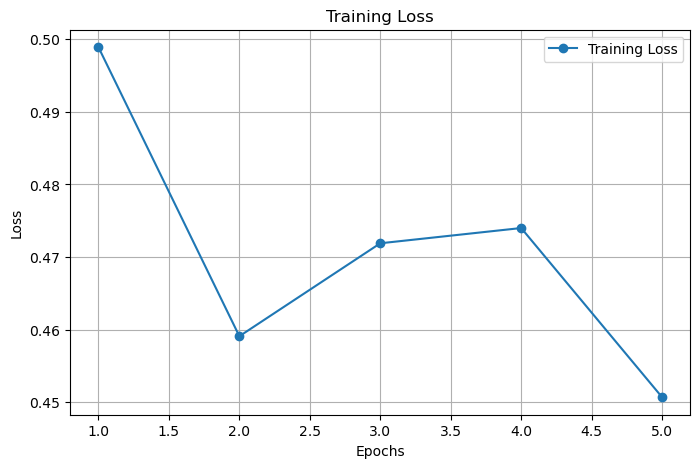

In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from transformers import BertTokenizer
from torch.utils.data import DataLoader, TensorDataset

train_losses = [0.4989, 0.4591, 0.4719, 0.4740, 0.4507]
epochs = range(1, len(train_losses) + 1)

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label="Training Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid()
plt.show()

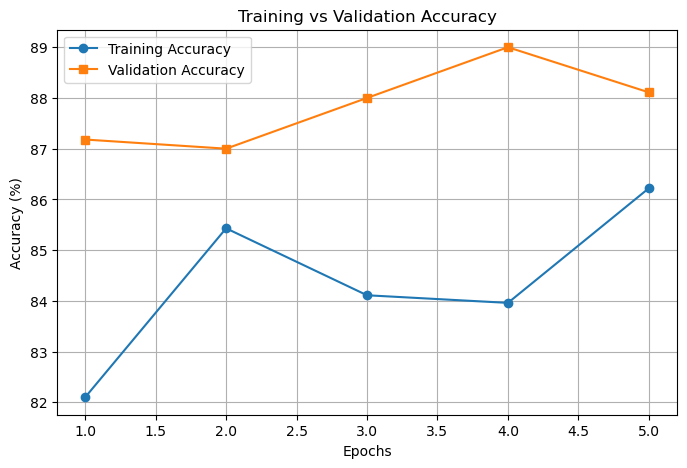

In [11]:
train_accuracies = [82.10, 85.43, 84.11, 83.96, 86.22]  # Example values
val_accuracies = [87.18,87,88,89,88.11]    # Example values

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(epochs, val_accuracies, label="Validation Accuracy", marker="s")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()


Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.87      0.88      0.88      3614
    Depressed       0.88      0.87      0.87      3528

     accuracy                           0.88      7142
    macro avg       0.88      0.88      0.88      7142
 weighted avg       0.88      0.88      0.88      7142



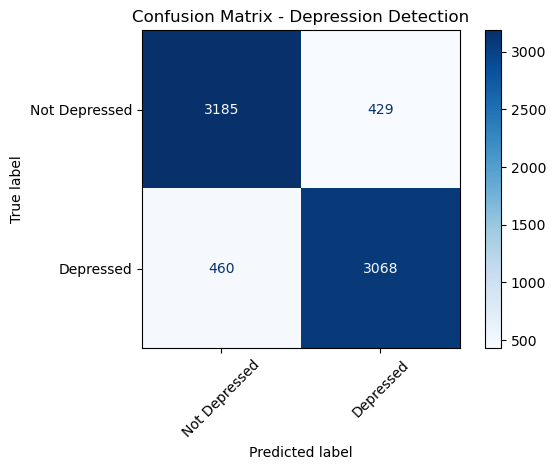

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for input_ids, attention_mask, labels in val_loader:
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Not Depressed", "Depressed"]))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Depression Detection")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Convert predictions and true labels to numpy arrays
y_true = all_labels  # ground truth labels from validation set
y_pred = all_preds   # predicted labels from the model

# Print evaluation metrics
print("✅ Evaluation Metrics:")
print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
print(f"Precision      : {precision_score(y_true, y_pred, average='weighted'):.4f}")
print(f"Recall         : {recall_score(y_true, y_pred, average='weighted'):.4f}")
print(f"F1 Score       : {f1_score(y_true, y_pred, average='weighted'):.4f}")

# Optional: Detailed breakdown by class
print("\n📋 Classification Report (per class):")
print(classification_report(y_true, y_pred, target_names=["Not Depressed", "Depressed"]))


✅ Evaluation Metrics:
Accuracy       : 0.8755
Precision      : 0.8755
Recall         : 0.8755
F1 Score       : 0.8755

📋 Classification Report (per class):
               precision    recall  f1-score   support

Not Depressed       0.87      0.88      0.88      3614
    Depressed       0.88      0.87      0.87      3528

     accuracy                           0.88      7142
    macro avg       0.88      0.88      0.88      7142
 weighted avg       0.88      0.88      0.88      7142

